In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df_all = pd.read_csv("all_projects.csv")
df_all = df_all.drop(columns=["project","init","end","project_url"])

X = df_all.drop(columns=["status"])
y = df_all["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
X_train.shape

(252, 25)

In [5]:
X_test.shape

(85, 25)

In [6]:
y_pred = np.zeros_like(y_test)

In [7]:
# Set random seed for reproducibility
np.random.seed(42)
random_seed = 42

In [8]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=random_seed),
    'Decision Tree': DecisionTreeClassifier(random_state=random_seed),
    'Random Forest': RandomForestClassifier(random_state=random_seed),
    'Support Vector Machine': SVC(random_state=random_seed),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=random_seed)
}

param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 5]},
    'Support Vector Machine': {'C': [0.1, 1, 10]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'Gradient Boosting': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
}

In [9]:
best_models = {}
for name, classifier in classifiers.items():
    print(f"\n{80*'-'}\n{f'Training {name}':^80}\n{80*'-'}")
    grid_search = GridSearchCV(classifier, param_grid=param_grids[name], scoring='roc_auc', cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Training ROC-AUC: {grid_search.best_score_:.2f}")


--------------------------------------------------------------------------------
                          Training Logistic Regression                          
--------------------------------------------------------------------------------
Best Hyperparameters: {'C': 0.1}
Training ROC-AUC: 0.79

--------------------------------------------------------------------------------
                             Training Decision Tree                             
--------------------------------------------------------------------------------
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Training ROC-AUC: 0.86

--------------------------------------------------------------------------------
                             Training Random Forest                             
--------------------------------------------------------------------------------
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimat

In [13]:
print("\nTest Set Evaluation:")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")


Test Set Evaluation:
Logistic Regression: Accuracy = 0.86
Decision Tree: Accuracy = 0.81
Random Forest: Accuracy = 0.91
Support Vector Machine: Accuracy = 0.86
K-Nearest Neighbors: Accuracy = 0.84
Gradient Boosting: Accuracy = 0.89


LogisticRegression does not have feature importances.


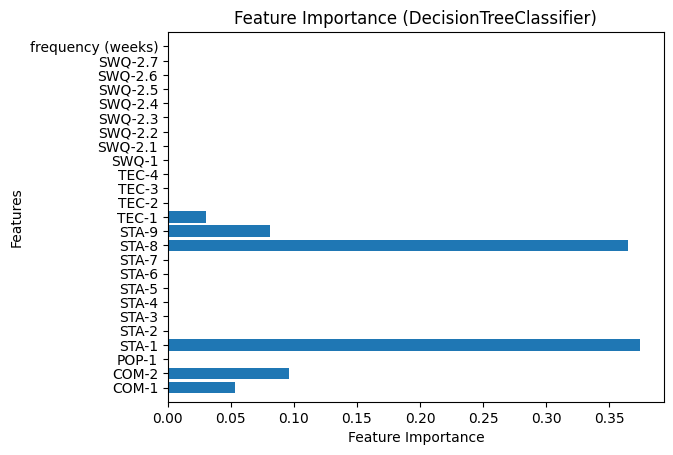

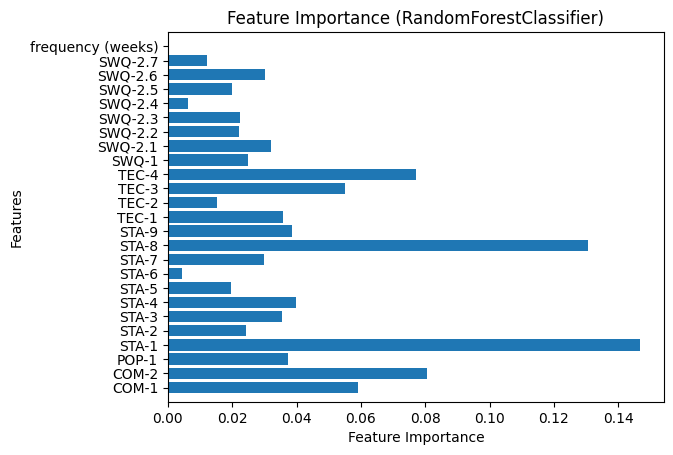

SVC does not have feature importances.
KNeighborsClassifier does not have feature importances.


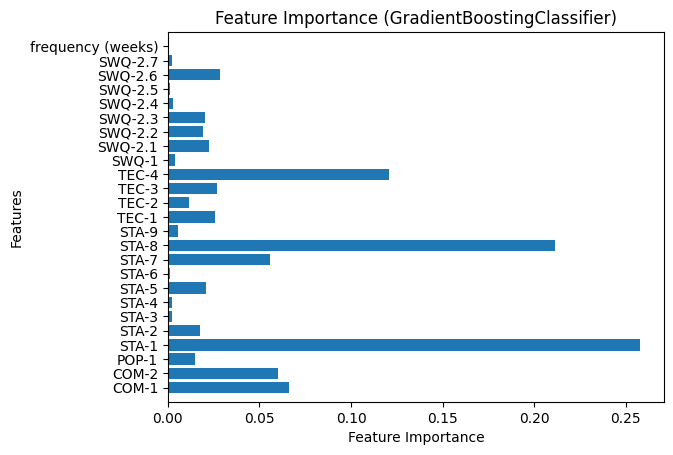

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        # For models that have feature_importances_
        n_features = len(feature_names)
        plt.barh(np.arange(n_features), model.feature_importances_, align='center')
        plt.yticks(np.arange(n_features), feature_names)
        plt.xlabel("Feature Importance")
        plt.ylabel("Features")
        plt.ylim(-1, n_features)
        plt.title(f"Feature Importance ({model.__class__.__name__})")
        plt.show()
    else:
        print(f"{model.__class__.__name__} does not have feature importances.")

for name, model in best_models.items():
    plot_feature_importances(model, X.columns.tolist())
